In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e4/sample_submission.csv
/kaggle/input/playground-series-s5e4/train.csv
/kaggle/input/playground-series-s5e4/test.csv
/kaggle/input/submission-6-podcast/submission6.csv


In [3]:
df=pd.read_csv("/kaggle/input/playground-series-s5e4/train.csv")

In [4]:
df_copy=df

In [5]:
df.shape

(750000, 12)

In [6]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [7]:
df.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [11]:
df=df.drop(['id'],axis=1)

In [12]:
df.shape

(750000, 11)

In [13]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [14]:
df.nunique()

Podcast_Name                      48
Episode_Title                    100
Episode_Length_minutes         12268
Genre                             10
Host_Popularity_percentage      8038
Publication_Day                    7
Publication_Time                   4
Guest_Popularity_percentage    10019
Number_of_Ads                     12
Episode_Sentiment                  3
Listening_Time_minutes         42807
dtype: int64

In [15]:
df = df.dropna(subset=['Number_of_Ads'])

In [16]:
df.shape

(749999, 11)

## creating a copy of df


In [87]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [88]:
# the podcast name seems to be not that usefull and it will be difficult to handle this cat values 
# therefor droping in 


In [89]:
# df=df.drop(['Podcast_Name'],axis=1)

In [90]:
# df=df.drop(['id'],axis=1)

In [91]:
df.shape

(749999, 11)

## Handling Ep title

In [17]:
df=df.drop(['Episode_Title'],axis=1)

In [6]:
# df['Episode_Title'] = df['Episode_Title'].str.extract('(\d+)').astype(int)


## Handling Missing values 
    we have missing in 2 columns:- 
    Episode_Length_minutes          87093 float
    Guest_Popularity_percentage    146030 float

    Filling them with median values 

In [7]:
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import StandardScaler

# # Step 1: Select relevant numerical columns for KNN Imputer
# num_cols = ['Episode_Length_minutes', 'Guest_Popularity_percentage']

# # Step 2: Scale the data (KNN works on distance metrics — scaling is important)
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df[num_cols])

# # Step 3: Apply KNN Imputer
# knn_imputer = KNNImputer(n_neighbors=5)
# imputed_data = knn_imputer.fit_transform(scaled_data)

# # Step 4: Inverse scale and assign back
# df[num_cols] = scaler.inverse_transform(imputed_data)


In [60]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [30]:
df.isna().sum()

Podcast_Name                   0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

## cat to num conversions 
    total 4 columns with object :-
    Genre                        749999 non-null  object   ✅
    Publication_Day              749999 non-null  object   ✅
    Publication_Time             749999 non-null  object   ✅
    Episode_Sentiment            749999 non-null  object   ✅

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749999 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 749999 non-null  int64  
 1   Episode_Length_minutes       662906 non-null  float64
 2   Genre                        749999 non-null  int64  
 3   Host_Popularity_percentage   749999 non-null  float64
 4   Publication_Day              749999 non-null  int64  
 5   Publication_Time             749999 non-null  int64  
 6   Guest_Popularity_percentage  603969 non-null  float64
 7   Number_of_Ads                749999 non-null  float64
 8   Episode_Sentiment            749999 non-null  int64  
 9   Listening_Time_minutes       749999 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 62.9 MB


In [11]:
df.nunique()

Podcast_Name                      48
Episode_Length_minutes         12268
Genre                             10
Host_Popularity_percentage      8038
Publication_Day                    7
Publication_Time                   4
Guest_Popularity_percentage    10019
Number_of_Ads                     12
Episode_Sentiment                  3
Listening_Time_minutes         42807
dtype: int64

In [18]:
# Handling sentment
# Define the order manually
order_map = {
    'Positive': 2,
    'Neutral': 1,
    'Negative': 0
}

df['Episode_Sentiment'] = df['Episode_Sentiment'].map(order_map)


In [19]:
pod_name={'Mystery Matters': 0, 'Joke Junction': 1, 'Study Sessions': 2, 'Digital Digest': 3, 'Mind & Body': 4, 'Fitness First': 5, 'Criminal Minds': 6, 'News Roundup': 7, 'Daily Digest': 8, 'Music Matters': 9, 'Sports Central': 10, 'Melody Mix': 11, 'Game Day': 12, 'Gadget Geek': 13, 'Global News': 14, 'Tech Talks': 15, 'Sport Spot': 16, 'Funny Folks': 17, 'Sports Weekly': 18, 'Business Briefs': 19, 'Tech Trends': 20, 'Innovators': 21, 'Health Hour': 22, 'Comedy Corner': 23, 'Sound Waves': 24, 'Brain Boost': 25, "Athlete's Arena": 26, 'Wellness Wave': 27, 'Style Guide': 28, 'World Watch': 29, 'Humor Hub': 30, 'Money Matters': 31, 'Healthy Living': 32, 'Home & Living': 33, 'Educational Nuggets': 34, 'Market Masters': 35, 'Learning Lab': 36, 'Lifestyle Lounge': 37, 'Crime Chronicles': 38, 'Detective Diaries': 39, 'Life Lessons': 40, 'Current Affairs': 41, 'Finance Focus': 42, 'Laugh Line': 43, 'True Crime Stories': 44, 'Business Insights': 45, 'Fashion Forward': 46, 'Tune Time': 47}
df['Podcast_Name'] = df['Podcast_Name'].map(pod_name)

In [20]:
# Handling publication time 
time_order = {
    'Morning': 0,
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3
}

df['Publication_Time'] = df['Publication_Time'].map(time_order)

In [21]:
day_order = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df['Publication_Day'] = df['Publication_Day'].map(day_order)


In [22]:
# # One-hot encode the mapped ordinal columns
# df = pd.get_dummies(df, columns=['Publication_Time', 'Publication_Day'], prefix=['Time', 'Day'])


In [23]:
# For genre we have 2 option either 1 hot encoder when we want to use linear models 
# or label encoders when we use tree based algo 


# opt2 if didnt get better results will move to 1 hot 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])


In [17]:
df.head()

,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,63.84,9,74.81,3,3,53.58,0.0,2,31.41998
1,1,119.80,1,66.95,5,1,75.95,2.0,0,88.01241
2,2,73.90,2,69.97,1,2,8.97,0.0,0,44.92531
3,3,67.17,8,57.22,0,0,78.70,2.0,2,46.27824
4,4,110.51,3,80.07,0,1,58.68,3.0,1,75.61031


## Handling outliers 

In [23]:
df.describe()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
count,750000.000000,0.0,662907.000000,750000.000000,750000.000000,0.0,0.0,603970.000000,749999.000000,0.0,750000.000000
mean,374999.500000,NaN,64.504738,4.648788,59.859901,NaN,NaN,52.236449,1.348855,NaN,45.437406
std,216506.495284,NaN,32.969603,2.963073,22.873098,NaN,NaN,28.451241,1.151130,NaN,27.138306
min,0.000000,NaN,0.000000,0.000000,1.300000,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,187499.750000,NaN,35.730000,2.000000,39.410000,NaN,NaN,28.380000,0.000000,NaN,23.178350
50%,374999.500000,NaN,63.840000,5.000000,60.050000,NaN,NaN,53.580000,1.000000,NaN,43.379460
75%,562499.250000,NaN,94.070000,7.000000,79.530000,NaN,NaN,76.600000,2.000000,NaN,64.811580
max,749999.000000,NaN,325.240000,9.000000,119.460000,NaN,NaN,119.910000,103.910000,NaN,119.970000


# We will start the EDA now 
     Then will handle outliers based on columns analysis

In [37]:
import matplotlib.pyplot as plt 
import seaborn as sns


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Genre', ylabel='Count'>

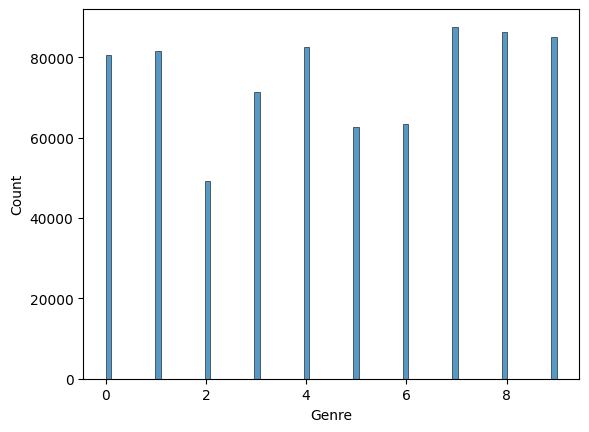

In [38]:
sns.histplot(df['Genre'])
# Genre are uniformally distributed 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Episode_Length_minutes', ylabel='Count'>

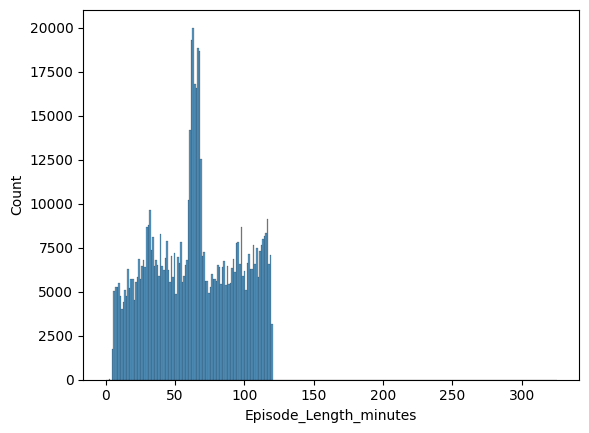

In [39]:
sns.histplot(df['Episode_Length_minutes'])

<Axes: >

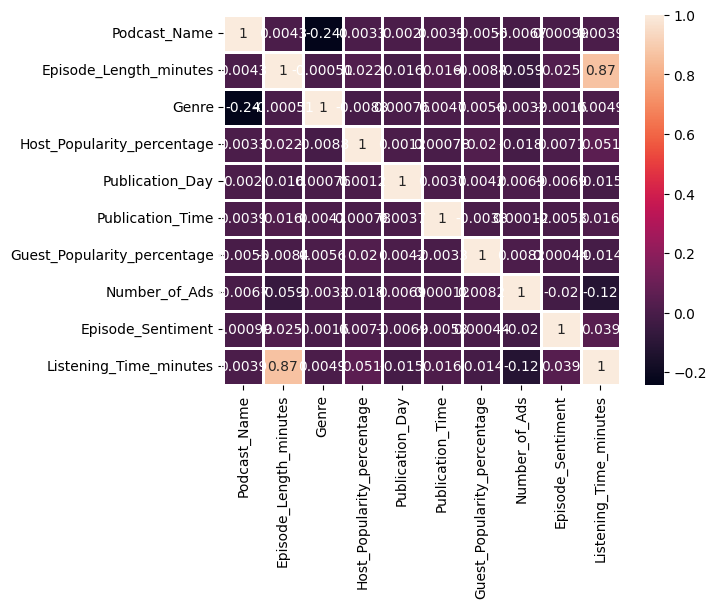

In [40]:

sns.heatmap(df.corr(),annot=True,linewidths=2)

# Here i see nearly all have no corr suggesting a non linear data 
    here for moving forward with tree based models 
    . Random forest 
    . Xgboost 
    . then will move to NN if needed 

In [18]:
# Save the DataFrame to a CSV file
df.to_csv('cleaned_dataset.csv', index=False)


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define features (X) and target (y)
X = df.drop(columns=['Listening_Time_minutes'])  # Replace with your actual target
y = df['Listening_Time_minutes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model


In [62]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error: 161.87
R² Score: 0.78
Root Mean Squared Error (RMSE): 12.72


In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Split features and target
X = df.drop(columns=['Listening_Time_minutes'])
y = df['Listening_Time_minutes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Parameter grid for tuning
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Use subset of training data for faster tuning
X_tune = X_train.sample(n=100000, random_state=42)
y_tune = y_train.loc[X_tune.index]

# Randomized search
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=25,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=2,  # limit workers to avoid crashing
    random_state=42
)
random_search.fit(X_tune, y_tune)

# Train final model with best params on full training set
best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Tuned Random Forest RMSE: {rmse:.2f}")


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Tuned Random Forest RMSE: 12.68


In [ ]:
df_test=pd.read_csv("/kaggle/input/playground-series-s5e4/test.csv")

In [37]:
df_test.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [38]:
df_test.shape

(250000, 11)

In [39]:
df=df_test

In [40]:
df=df.drop(['id'],axis=1)

In [41]:
df.shape

(250000, 10)

In [42]:
df.isna().sum()

Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [43]:
df.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
count,2.212640e+05,250000.000000,201168.000000,250000.000000
mean,4.192987e+02,59.716491,52.192796,1.355852
std,1.668545e+05,22.880028,28.445034,4.274399
min,2.470000e+00,2.490000,0.000000,0.000000
25%,3.578000e+01,39.250000,28.320000,0.000000
50%,6.397000e+01,59.900000,53.360000,1.000000
75%,9.415000e+01,79.390000,76.560000,2.000000
max,7.848626e+07,117.760000,116.820000,2063.000000


In [53]:
y_test_pred=model.predict(df)

In [54]:
y_test_pred.shape

(250000,)

In [55]:
import pandas as pd

# Create ID column from 750000 to 750000 + len(y_test_pred) - 1
start_id = 750000
ids = range(start_id, start_id + len(y_test_pred))

# Create the DataFrame
submission_df = pd.DataFrame({
    'id': ids,
    'Listening_Time_minutes': y_test_pred.flatten()  # Flatten in case it's (250000, 1)
})

# Save to CS
submission_df.to_csv('submission6.csv', index=False)

# Optional: show first few rows
submission_df.head()


,id,Listening_Time_minutes
0,750000,56.867682
1,750001,23.196290
2,750002,51.612417
3,750003,71.308014
4,750004,43.931162


In [56]:
def cap_outliers_iqr(df, column):
    """
    Caps values beyond 1.5*IQR to the lower and upper bounds.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)
    return df

# Apply to Number_of_Ads
df_out_removed = cap_outliers_iqr(df, 'Number_of_Ads')


In [57]:
y_test_pred=model.predict(df_out_removed)

In [59]:
import pandas as pd

# Create ID column from 750000 to 750000 + len(y_test_pred) - 1
start_id = 750000
ids = range(start_id, start_id + len(y_test_pred))

# Create the DataFrame
submission_df = pd.DataFrame({
    'id': ids,
    'Listening_Time_minutes': y_test_pred.flatten()  # Flatten in case it's (250000, 1)
})

# Save to CSV
submission_df.to_csv('submission7.csv', index=False)

# Optional: show first few rows
submission_df.head()


,id,Listening_Time_minutes
0,750000,56.867682
1,750001,23.196290
2,750002,51.612417
3,750003,71.308014
4,750004,43.931162


In [41]:
# df_new=pd.read_csv("/kaggle/input/submission-6-podcast/submission6.csv")

In [42]:
# df_new['Listening_Time_minutes'] = df_new['Listening_Time_minutes'] * 1.005
# df_new.head()
# df_new.shape
# df_new.isna().sum()
# df_new.to_csv('submission14.csv', index=False)

In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assume df is your DataFrame and 'target' is your target column
target_col = 'Listening_Time_minutes'  # change this to your actual target column

# Step 1: Compute correlation with target
corr = df.corr(numeric_only=True)[target_col]

# Step 2: Filter features with abs(correlation) >= 0.01
selected_features = corr[abs(corr) >= 0.01].index.tolist()

# Remove the target itself from the list
selected_features.remove(target_col)

# Step 3: Subset the dataframe
X = df[selected_features]
y = df[target_col]

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Fit Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Selected features: {selected_features}")
print(f"RMSE: {rmse:.2f}")


Selected features: ['Episode_Title', 'Episode_Length_minutes', 'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment']
RMSE: 12.67


In [38]:
Selected features: ['Episode_Title', 'Episode_Length_minutes', 'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment']

SyntaxError: invalid syntax (<ipython-input-38-a168d6ab6b72>, line 1)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Use the previously selected features
X = df.drop(columns=['Listening_Time_minutes'])
y = df['Listening_Time_minutes']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 4. Predict
y_pred = linear_model.predict(X_test)

# 5. Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Model RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [41]:
df_out_removed=df

In [42]:
df_out_removed.columns

Index(['Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes'],
      dtype='object')

In [43]:
columns = ['Episode_Title', 'Episode_Length_minutes', 'Genre',
           'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
           'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment']

def handle_outliers_iqr_cap(df, column):
    """
    Detects outliers using IQR and caps them to lower/upper bounds.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)
    return df

# Apply IQR capping only on numerical columns from the list
for col in columns:
    if pd.api.types.is_numeric_dtype(df_out_removed[col]):
        df_out_removed = handle_outliers_iqr_cap(df_out_removed, col)


In [44]:
# model app 2 with outliers winsorize 


X = df_out_removed.drop(columns=['Listening_Time_minutes'])  # Replace with your actual target
y = df_out_removed['Listening_Time_minutes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model


In [45]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error: 160.41
R² Score: 0.78
Root Mean Squared Error (RMSE): 12.67


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Feature matrix and target
X = df_out_removed.drop(columns=['Listening_Time_minutes'])  # all features
y = df_out_removed['Listening_Time_minutes']                 # target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression RMSE: {rmse:.2f}")


Linear Regression RMSE: 13.31


In [26]:
# applying xgboosting 
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Feature matrix and target
X = df.drop(columns=['Listening_Time_minutes'])
y = df['Listening_Time_minutes']  # replace with your actual target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and fit XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost RMSE: {rmse:.2f}")


XGBoost RMSE: 12.97


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define base model
rf = RandomForestRegressor(random_state=42)

# Parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# GridSearch with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)
print(f"Tuned Random Forest RMSE: {rmse:.2f}")



Fitting 3 folds for each of 48 candidates, totalling 144 fits


KeyboardInterrupt: 

In [29]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np



# Feature matrix and target
X = df.drop(columns=['Listening_Time_minutes'])
y = df['Listening_Time_minutes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# If you have categorical columns, specify their indices
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Initialize CatBoost
catboost_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    cat_features=cat_cols,
    verbose=100,
    random_state=42
)

# Fit the model
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# Predict
y_pred = catboost_model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"CatBoost RMSE: {rmse:.2f}")

y = df['Listening_Time_minutes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# If you have categorical columns, specify their indices
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Initialize CatBoost
catboost_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    cat_features=cat_cols,
    verbose=100,
    random_state=42
)

# Fit the model
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# Predict
y_pred = catboost_model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"CatBoost RMSE: {rmse:.2f}")

y = df['Listening_Time_minutes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# If you have categorical columns, specify their indices
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Initialize CatBoost
catboost_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    cat_features=cat_cols,
    verbose=100,
    random_state=42
)

# Fit the model
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# Predict
y_pred = catboost_model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"CatBoost RMSE: {rmse:.2f}")


0:	learn: 26.1609498	test: 26.1594819	best: 26.1594819 (0)	total: 102ms	remaining: 1m 41s
100:	learn: 13.2087944	test: 13.1397169	best: 13.1397169 (100)	total: 3.79s	remaining: 33.7s
200:	learn: 13.1606615	test: 13.0997763	best: 13.0997763 (200)	total: 7.25s	remaining: 28.8s
300:	learn: 13.1331239	test: 13.0785699	best: 13.0785699 (300)	total: 10.7s	remaining: 24.8s
400:	learn: 13.1089544	test: 13.0636822	best: 13.0636822 (400)	total: 14.2s	remaining: 21.2s
500:	learn: 13.0879246	test: 13.0520124	best: 13.0520124 (500)	total: 17.6s	remaining: 17.6s
600:	learn: 13.0701661	test: 13.0433878	best: 13.0433878 (600)	total: 21.1s	remaining: 14s
700:	learn: 13.0539826	test: 13.0355846	best: 13.0355846 (700)	total: 24.6s	remaining: 10.5s
800:	learn: 13.0386090	test: 13.0285147	best: 13.0285147 (800)	total: 28.6s	remaining: 7.12s
900:	learn: 13.0239456	test: 13.0227824	best: 13.0227824 (900)	total: 32.2s	remaining: 3.53s
999:	learn: 13.0108264	test: 13.0170994	best: 13.0170994 (999)	total: 35.7s

## NN on outliers removed data 

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Define features and target from df (with outliers)
X = df.drop(columns=['Listening_Time_minutes'])
y = df['Listening_Time_minutes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Deep Neural Network model
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Deep Neural Net RMSE (with outliers): {rmse:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4688/4688 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
Deep Neural Net RMSE (with outliers): 13.40


In [27]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split features and target
X = df.drop(columns=['Listening_Time_minutes'])  # Replace with your DataFrame if needed
y = df['Listening_Time_minutes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize LGBM Regressor
lgbm = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    random_state=42,
    n_jobs=-1
)

# Fit the model
lgbm.fit(X_train, y_train)

# Predict
y_pred = lgbm.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"LightGBM RMSE: {rmse:.2f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 599999, number of used features: 9
[LightGBM] [Info] Start training from score 45.441775
LightGBM RMSE: 13.00


In [28]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split features and target
X = df.drop(columns=['Listening_Time_minutes'])
y = df['Listening_Time_minutes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create validation set
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

# Initialize the model
lgbm = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=10,
    num_leaves=64,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=5,
    random_state=42,
    n_jobs=-1
)

# Fit the model using callbacks only (no verbose param)
lgbm.fit(
    X_train_sub, y_train_sub,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)

# Predict and evaluate
y_pred = lgbm.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"LightGBM RMSE (Improved): {rmse:.2f}")


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in 

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization, LeakyReLU, GaussianNoise
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import Huber
import numpy as np

# Define features and target
X = df.drop(columns=['Listening_Time_minutes'])
y = df['Listening_Time_minutes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build improved neural network
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    GaussianNoise(0.1),

    Dense(512, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dense(1)
])

# Compile with Huber loss (robust to outliers)
model.compile(optimizer=Adam(learning_rate=0.0005), loss=Huber(delta=1.0))

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=300,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=0
)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Ultra-Optimized Neural Net RMSE: {rmse:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4688/4688 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
Ultra-Optimized Neural Net RMSE: 13.22


In [51]:
model.save("neural_net_model")


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=neural_net_model.